# 점진적인 학습
확률적 경사하강법을 사용

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

In [4]:
fish_input = fish.drop('Species', axis=1).to_numpy()
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss ='log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [13]:
sc.partial_fit(train_scaled, train_target)  #partial_fit 은 이전의 학습에 이어서 한 epoch씩 학습할 수 있다.
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8487394957983193
0.85


In [15]:
#각 epoch에 따른 훈련-테스트 세트의 정확도 증감 함수를 그려보기
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)

train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300): #_는 나중에 사용하지 않고 그냥 버리는 용도의 변수
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

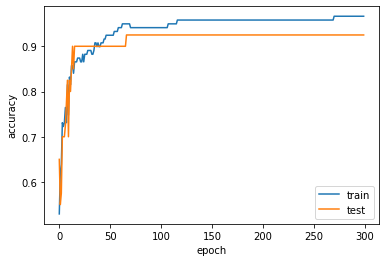

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

#100번째 epoch정도가 적절해 보임

In [20]:
sc = SGDClassifier(loss = 'log', random_state = 42, max_iter = 100, tol=None)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.957983193277311
0.925


logistict 손실함수가 아닌 다른 손실함수를 사용할 수도 있다.

기본값은 hinge
